<a href="https://colab.research.google.com/github/d-hackmt/Fundamentalss-of-Machine-Learning/blob/main/logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression Model form skLearn

## BINARY CLASSIFICATION

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving hr.csv to hr.csv


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('hr.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##Data exploration and visualization

In [ ]:
left = df[df.left==1]                                             #print the shape of left = 1 ,  meaning how many left the company
left.shape

(3571, 10)

In [ ]:
retained = df[df.left==0]                                         #print the shape of left = 0 ,  meaning how many did not leave the company
retained.shape

(11428, 10)

##Average numbers for all columns

In [ ]:
df.groupby('left').mean()                                         #find out the overall mean all attributes or columns of left the company or not 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

##**Impact of salary on employee retention** 





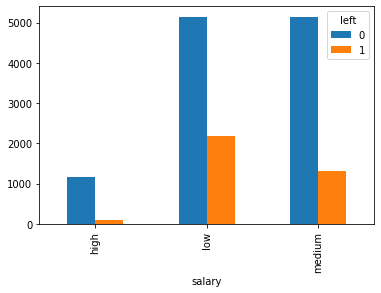

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')                                       # Cross tabulation is a statistical tool that is used to analyze categorical data.
                                                                                      # The crosstab() function is used to compute a simple cross tabulation of two (or more) factors.

##Above bar chart shows employees with high salaries are likely to not leave the company

##**Department wise employee retention rate**

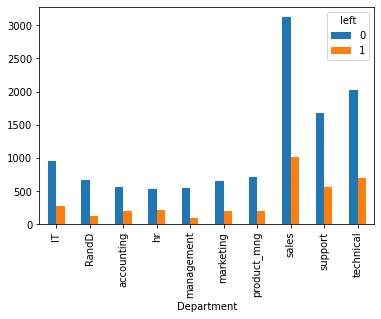

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

##From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis



##From the data analysis so far we can conclude that we will use following variables as independant variables in our model

**Satisfaction Level**

**Average Monthly Hours**

**Promotion Last 5 Years**

**Salary**

In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


##Tackle salary dummy variable.

##Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [ ]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [ ]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [ ]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


## Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [ ]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


# **NOW** LETS MAKE DEPENDENT AND INDEPENTENT VARIABLES TO USE  A MODEL OF IT

In [ ]:
X = df_with_dummies                                                                  # DEPENDENT

In [ ]:
y = df.left                                                                          # INDEPENDENT

In [ ]:
from sklearn.model_selection import train_test_split                                    #splitting our data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)                                                

In [ ]:
from sklearn.linear_model import LogisticRegression                                  # using logistic regression model 
model = LogisticRegression()    

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

## **Accuracy of the model**

In [ ]:
model.score(X_test,y_test)

0.7778095238095238

## MULTICLASS CLASSIFICATION

### Classification of digits and visualization to see the accuracy of model using seaborn with implementation of logistic regression

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline
digits = load_digits()


<Figure size 432x288 with 0 Axes>

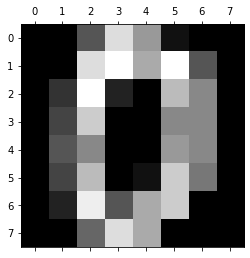

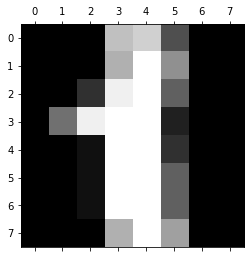

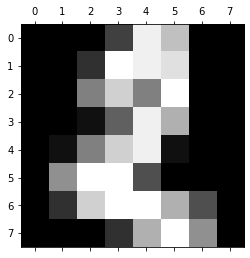

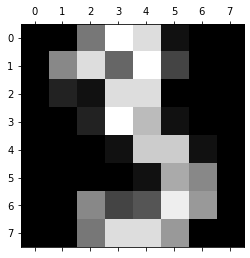

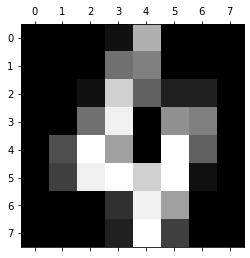

In [ ]:
plt.gray()
for i in range (5):
  plt.matshow(digits.images[i])

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Create and train logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Measure accuracy of our model

In [ ]:
model.score(X_test, y_test)

0.975

In [ ]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

## Confusion Matrix

## What is confusion matrix?
Image result for confusion matrix
A confusion matrix is a table that is used to define the performance of a classification algorithm.
# A confusion matrix visualizes and summarizes the performance of a classification algorithm.

# Here we are using this confusion matrix to see that our model is .975 accurate why isnt it 1.0

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 35,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1, 26,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 40]])

now to visualize the model in a better way we use seaborn

Text(69.0, 0.5, 'Truth')

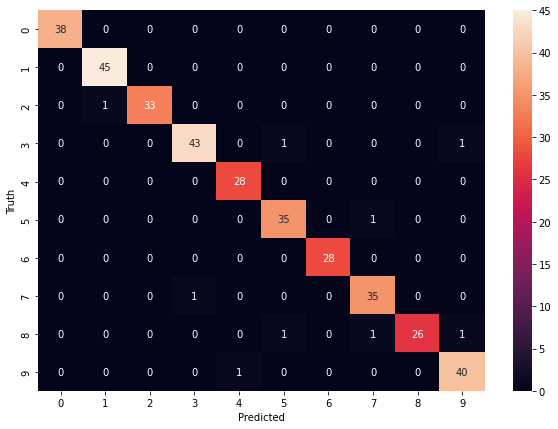

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,


* Sepal Length

* Sepal Width

* Petal Length

* Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

* Setosa

* Versicolour
* Virginica

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
# here the data is divided in key value pairs so we have to seperate these first

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


make a dataframe of our data in pandas

In [ ]:
df = pd.DataFrame(iris.data)
print(df.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [ ]:
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## data info for preprocessing so that we can define x and y

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## check for dependent and independent variable

In [ ]:
X = iris.data                          #independent
Y= iris.target                         # those 3 flowers are target variables

In [ ]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=2)

In [ ]:
#our data is scalled so no scalling required
lorg = LogisticRegression(random_state=0)
lorg.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
Y_pred = lorg.predict(X_test)
print(Y_pred)

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1]


## Now we use confusion matrix to print the accuracy of the model

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test ,Y_pred)
cm

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]])

## Here diagonal elements shows that its the correct fit and other show its incorrect fit

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test ,Y_pred))

0.9736842105263158
